In [ ]:
# Explatory Data Analysis
# Abhinav Mohan 

# MNIST Digit Visualization

In [2]:
# Print Libraries

In [3]:
from time import time

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import offsetbox

from sklearn import manifold, datasets, decomposition 

# Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA 
# to be sensitive to non-linear structure in data. It is an UNSUPERVISED method typically! Where it learns from the data
# without pre-determined classifications

# decomposition is for SVD and PCA, so that you can get eigenvalues and vectors

In [4]:
# Load Datasets

In [9]:
digits = datasets.load_digits(n_class = 6)    # Loading the data using the sklearn library; n digits present = n_class - 1 (0 as first)
# print(digits) # digits is a dataset of images which are characterized by matrices indicating pixels and depth
# Each datapoint is a 8x8 image of a digit.

X = digits.data # needed to extract the data for each digit
print(X) # X contains the data (i.e. color matrices) for the rgb values of each pixel and is what is used to show the images


y = digits.target 
print(y) # the list of digits being analyzed
print(y.shape)

n_samples, n_features = X.shape # there are 1083 diff images (samples) and each image has 64 features (pixels) or dimensions
print(X.shape)
# n_neighbors = 30 # not used in this code

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  0. ...  9.  0.  0.]
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]]
[0 1 2 ... 4 4 0]
(1083,)
(1083, 64)


(1083, 64)


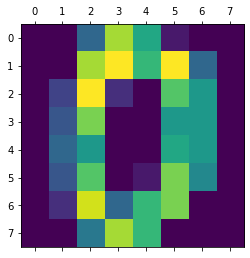

In [6]:
print(X.shape)    # Printing the dimensions of X

plt.matshow(digits.images[0]) # images has 1083 images, each index is an 8x8 image

In [7]:
# Observation:

# X has 1083 different images and each image is represented in 64 dimensions.

In [8]:
# Data Visualization and PCA

In [10]:
# t-SNE embedding of the digits dataset

print("Computing t-SNE embedding")

t0 = time()

tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)  # n_components: number of dimensions to reduce to
# manifold is the library used for doing tSNE method
# init = 'PCA' do principal component analysis, applying tSNE embedding
# random state is to set seed for reproducibility
# n_components is the dimensions of the embedded space - usually 2 for PCA
print(tsne.learning_rate) # as we see from this line of code, we find that the inputs to manifold.TSNE become objects for tsne

X_tsne = tsne.fit_transform(X) # applies dimension reduction to X and returns the transformed matrix in the low dim space

t1 = time() 

tsne_time = t1-t0 

print("t-SNE-Embeddings in time {}".format(tsne_time),"\n", X_tsne)

print("***************************************************")

# Projection on the first 2 principal components using PCA

print("Computing PCA projection")

t0 = time()

X_pca = decomposition.PCA(n_components = 2).fit_transform(X) # decomposition.PCA is a scikit method for PCA and reducing data dimensions
# everything condensed into one line

t1 = time()

pca_time = t1 - t0

print("PCA projections in time {}".format(pca_time), "\n", X_pca)

print("***************************************************")

Computing t-SNE embedding
200.0
t-SNE-Embeddings in time 2.2589633464813232 
 [[ 16.14687   -42.780197 ]
 [  6.1760626  36.043736 ]
 [ -7.26177    31.931921 ]
 ...
 [ 39.044537   18.338238 ]
 [ 37.07782    14.362949 ]
 [ 26.177761  -36.468166 ]]
***************************************************
Computing PCA projection
PCA projections in time 0.0029904842376708984 
 [[ 10.76255827 -24.73806959]
 [ -0.62690576  26.83050009]
 [  1.68580001  12.29145417]
 ...
 [ 30.84986547   6.30638455]
 [ 32.14391404  10.57477515]
 [ 16.46964942 -21.36013713]]
***************************************************


In [11]:
# TSNE takes longer!

In [12]:
for i in X_tsne:
    print(i, i[0], i[1]) # each element in X_tsne is a coordinate, so collect all the x and corresponding y coordinates as list and plot!

print("\n\n")
for i in X_pca:
    print(i[0], i[1])

[ 16.14687  -42.780197] 16.14687 -42.780197
[ 6.1760626 36.043736 ] 6.1760626 36.043736
[-7.26177  31.931921] -7.26177 31.931921
[-27.607077 -20.739897] -27.607077 -20.739897
[35.501682 20.219376] 35.501682 20.219376
[-23.294407 -22.28886 ] -23.294407 -22.28886
[ 12.1592   -43.477512] 12.1592 -43.477512
[14.135206 28.726892] 14.135206 28.726892
[-34.39149   19.446148] -34.39149 19.446148
[-32.425205 -11.29969 ] -32.425205 -11.29969
[36.534153 12.440305] 36.534153 12.440305
[-0.47090673 -2.496356  ] -0.47090673 -2.496356
[ 22.946737 -34.390434] 22.946737 -34.390434
[10.984208 28.249123] 10.984208 28.249123
[-38.180214  18.004883] -38.180214 18.004883
[-32.418243   -4.1307945] -32.418243 -4.1307945
[33.204285 18.984047] 33.204285 18.984047
[2.3798559 0.7690024] 2.3798559 0.7690024
[ 12.662044 -38.20526 ] 12.662044 -38.20526
[-1.9381608 -9.899618 ] -1.9381608 -9.899618
[-5.803491  -4.4718757] -5.803491 -4.4718757
[-5.922962  -4.4801764] -5.922962 -4.4801764
[ 26.34801  -34.515385] 26.3480

[-25.30359    -5.3302355] -25.30359 -5.3302355
[-24.980434   -4.3436446] -24.980434 -4.3436446
[-27.819366   -4.0006437] -27.819366 -4.0006437
[-25.756477   -5.7490993] -25.756477 -5.7490993
[38.424496  4.194935] 38.424496 4.194935
[-6.264501 12.589472] -6.264501 12.589472
[ 3.474546 43.2426  ] 3.474546 43.2426
[-0.15232438  4.1744103 ] -0.15232438 4.1744103
[ 23.681782 -31.386696] 23.681782 -31.386696
[ 1.6575091 -7.0557327] 1.6575091 -7.0557327
[-27.423676  16.601969] -27.423676 16.601969
[ 13.720096 -48.10863 ] 13.720096 -48.10863
[ 4.728277 43.388515] 4.728277 43.388515
[-31.496897  -8.107607] -31.496897 -8.107607
[-45.027832  22.533085] -45.027832 22.533085
[ 6.6020594 42.233852 ] 6.6020594 42.233852
[-6.255782 12.601469] -6.255782 12.601469
[-33.317024  -9.256475] -33.317024 -9.256475
[ 6.4232736 41.407047 ] 6.4232736 41.407047
[-37.960564  -9.418603] -37.960564 -9.418603
[ 4.754183 41.53623 ] 4.754183 41.53623
[41.1401  10.09936] 41.1401 10.09936
[-32.089256  -9.805363] -32.0892

In [13]:
# Fn for scatter plot and embeds

In [14]:
# Function to create scatter plot

def scatter(X, title = None):
    x1 = []
    
    x2 = []
    
    plt.figure(figsize = (10, 10))
    
    plt.title(title)
    
    for i in X:
        x1.append(i[0])
         
        x2.append(i[1])
        # in the transformed data, i[0] contains x values and i[1] the y values
    
    sns.scatterplot(x = x1, y = x2)
    plt.show()

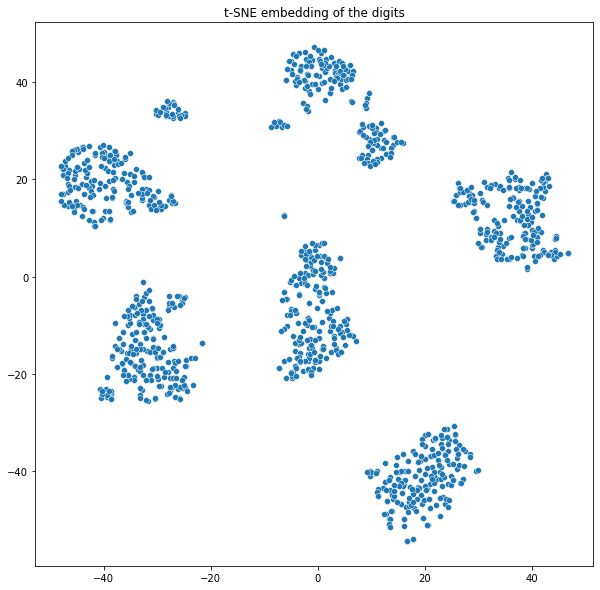

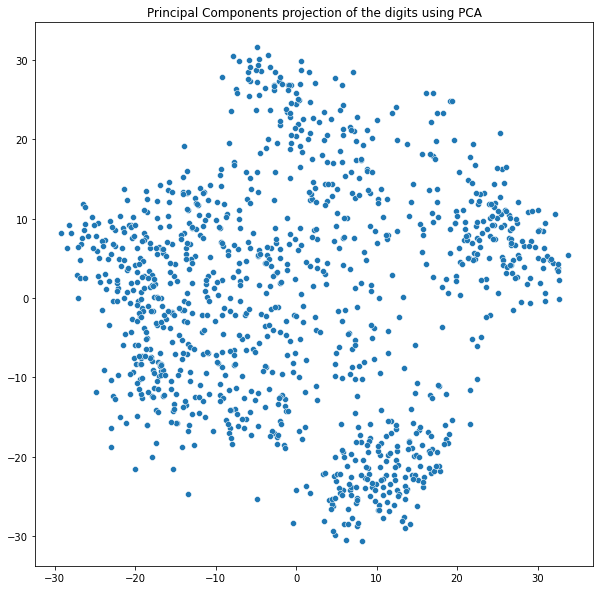

In [15]:
scatter(X_tsne, "t-SNE embedding of the digits")

scatter(X_pca, "Principal Components projection of the digits using PCA")

In [16]:
array1 = []
array2 = []
for i in X_tsne:
    array1.append(i[0])
    array2.append(i[1])
    
print("X_tsne shape: ", X_tsne.shape)
print("array 1 (x values) sorted: ", np.sort(array1))
print("min of array 1: ", np.min(array1))
print("array 2 (y values) sorted: ", np.sort(array2))
print("min of array 2: ", np.min(array2))

print("x_min tsne: (min(a) argument))", np.min(X_tsne))
# np.min(a) just returns the minimum value in all of a

print("x_min tsne: (min(a,0) argument))", np.min(X_tsne, 0))
# np.min(a, axis = 0) returns the minimum value in all of the columns of a as a single row vector, in this case minX and minY

print("x_min tsne: (min(a,1) argument))", np.sort(np.min(X_tsne, 1)))
# np.min(a, axis = 1) returns the minimum value in all of the rows of a as a single row vector 

X_tsne shape:  (1083, 2)
array 1 (x values) sorted:  [-48.029503 -47.940563 -47.88598  ...  45.27172   46.71963   46.755806]
min of array 1:  -48.029503
array 2 (y values) sorted:  [-54.325073 -54.31391  -53.934273 ...  46.527824  46.532566  47.231834]
min of array 2:  -54.325073
x_min tsne: (min(a) argument)) -54.325073
x_min tsne: (min(a,0) argument)) [-48.029503 -54.325073]
x_min tsne: (min(a,1) argument)) [-54.325073 -54.31391  -53.934273 ...  20.445614  21.073015  21.50067 ]


In [17]:
# Scale and visualize the embedding vectors

def plot_embedding(X, title=None):              # Passing the embedded array and the title of the graph
    
    print(X)                                        
    
    x_min, x_max = np.min(X, 0), np.max(X, 0)   # Finding the max and min of the passed array
    
    X = (X - x_min) / (x_max - x_min)           # Scaling the array, new values are between 0 and 1
    # ex. X_tsne = (X_tsne - x_min)/(x_max - x_min)

    plt.figure(figsize = (12, 12))               # Setting the figure size to a sufficiently large value
    
    ax = plt.subplot(111)
    
    for i in range(X.shape[0]): # shape[0] gives number of rows so in each row pick up the x and y values!
        '''print("X: ", X[i,0]) # x values
        print("Y: ", X[i, 1]) # y values
        print("Target Value ", y[i]) # target value'''
        
        plt.text(X[i, 0], X[i, 1], str(y[i]), # prints the numbers as colors in the grid
                 
                 color = plt.cm.Set1(y[i] / 8.), # Adjust color accordingly
                 
                 fontdict = {'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])      # Just something big, or anything really, to offset the coors for the numbers and text matrix
        
        for i in range(X.shape[0]): # looking at each row, so the x, y coors
            
            dist = np.sum((X[i] - shown_images) ** 2, 1) #sum((x2 - xc)^2 + (y2 - yc)^2) - distance formula!

            if np.min(dist) < 4e-3:
                
                # don't show points that are too close
                continue
            
            shown_images = np.r_[shown_images, [X[i]]] # concatenate the image matrix [1,1] to the x/y rows of X so is added as an additional row
            
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r), X[i])
            
            ax.add_artist(imagebox)
    
    plt.xticks([]), plt.yticks([])
    
    if title is not None:
        
        plt.title(title)
    
    plt.show()

[[ 16.14687   -42.780197 ]
 [  6.1760626  36.043736 ]
 [ -7.26177    31.931921 ]
 ...
 [ 39.044537   18.338238 ]
 [ 37.07782    14.362949 ]
 [ 26.177761  -36.468166 ]]


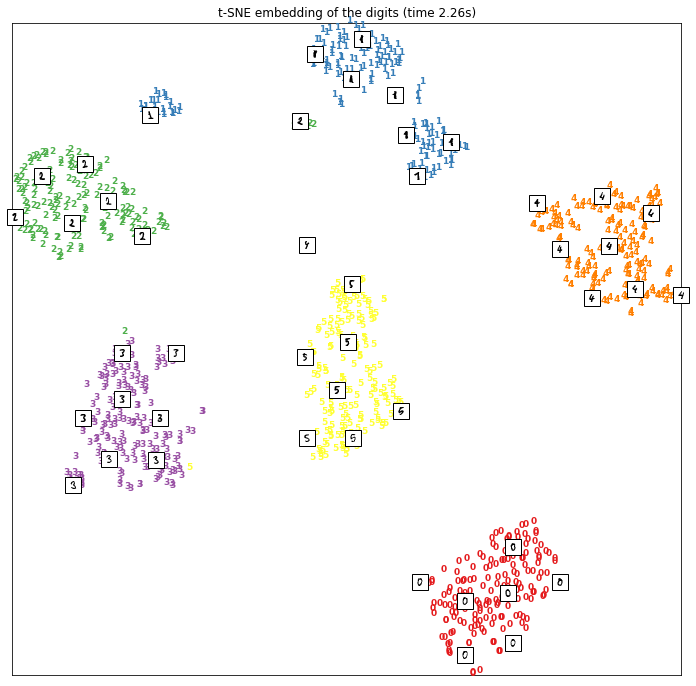

[[ 10.76255827 -24.73806959]
 [ -0.62690576  26.83050009]
 [  1.68580001  12.29145417]
 ...
 [ 30.84986547   6.30638455]
 [ 32.14391404  10.57477515]
 [ 16.46964942 -21.36013713]]


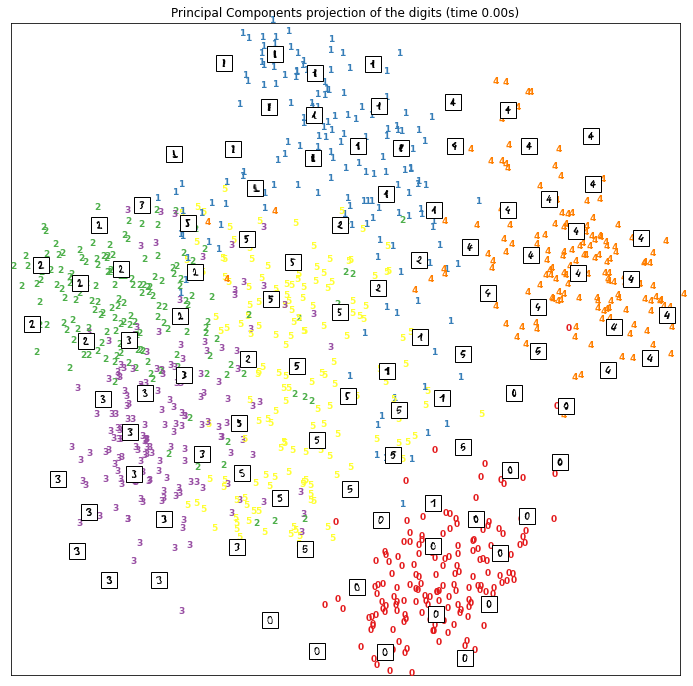

In [18]:
# Plotting t-SNE embeddings 
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (tsne_time))

# Plotting PCA projections
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (pca_time))

In [19]:
# Results and Conclusion
'''We have effectively reduced the dimensionality of the images, from 64 to 2, using t-SNE and PCA, and plotted the 2D embeddings and projections.
Out of the two methods used above, t-SNE takes a longer time to generate embeddings but gives better visualizations with well-separated clusters for each handwritten digit.
The annotations show that while PCA gives the same clusters, the overall plot represents more of a blob and is not as well-separated as t-SNE.
t-SNE is good for visualizing the data in lower dimensions but is very slow and should only be used on small datasets, whereas PCA is more computationally efficient and can be used on large datasets as well.'''

'We have effectively reduced the dimensionality of the images, from 64 to 2, using t-SNE and PCA, and plotted the 2D embeddings and projections.\nOut of the two methods used above, t-SNE takes a longer time to generate embeddings but gives better visualizations with well-separated clusters for each handwritten digit.\nThe annotations show that while PCA gives the same clusters, the overall plot represents more of a blob and is not as well-separated as t-SNE.\nt-SNE is good for visualizing the data in lower dimensions but is very slow and should only be used on small datasets, whereas PCA is more computationally efficient and can be used on large datasets as well.'

In [20]:
np.c_['c',np.array([1,2,3]), np.array([4,5,6])] # np.r_ concatenates all as row matrix/vector, so shape doesn't matter as long as its singular vector
# np.c_ concatenates as column matrix, using the first element of each array as a row, so there are 3 rows, 2 cols 

matrix([[1, 4],
        [2, 5],
        [3, 6]])